In [307]:
#@title Importations
import csv
import random
import matplotlib.pyplot as plt
import timeit
from copy import deepcopy

In [300]:
#@title Exemple 8.1

class BandeDessinee:

    def __init__(self, titre, annee, collection, auteur, illustrateur=""):
        self._titre = titre
        self._auteur = auteur
        self._collection = collection
        self._annee = int(annee)
        if not illustrateur:
            illustrateur = auteur
        self._illustrateur = illustrateur
        # Pour exercice 8.4
        self._mode = None

    def get_titre(self) -> str:
        return self._titre

    def get_collection(self) -> str:
        return self._collection
                    
    def get_auteur(self) -> str:
        return self._auteur
    
    def set_annee(self, annee) -> None:
        self._annee = annee

    def get_annee(self) -> int:
        return self._annee
    
    def get_illustrateur(self) -> str:
        return self._illustrateur
    
    def __str__(self) -> str:
        chaine = f"{self._collection}: {self._titre}, {self._annee}"
        return chaine

    
    # Pour les exercices 8.4 et 8.5
    def __eq__(self, other) -> bool:
        egal = self._titre == other._titre
        egal = egal and self._collection == other._collection
        egal = egal and self._auteur == other._auteur
        egal = egal and self._annee == other._annee
        egal = egal and self._illustrateur == other._illustrateur
        return egal
    
    def set_mode(self, mode):
        self._mode = mode
    
    def __hash__(self) -> int:
        if self._mode == "42":
            return int(42)
        elif self._mode == "annee":
            return self._annee
        else:
            return hash(f"{self._collection}:{self._titre}") + hash(self._annee)
            


In [301]:
#@title Exercice 8.1

nom_fichier = "bd_original.csv"

les_livres = []


with open("bd_original.csv", "r", encoding="utf-8") as fichier:
    reader = csv.reader(fichier, delimiter=";")
    next(reader) # On passe la première ligne
    for line in reader:
        nouveau_livre = BandeDessinee(line[0], line[1], line[2], line[3], line[4])
        les_livres.append(nouveau_livre)

print(f"Le fichier contient {len(les_livres)} livres")


Le fichier contient 683 livres


In [302]:
#@title Exercice 8.2

def retirer_doublons_liste(elements):
    elements_trouve = []
    for element in elements:
        if element not in elements_trouve:
            elements_trouve.append(element)
    elements.clear()
    elements.extend(elements_trouve)


def retirer_doublons_set(elements):
    ensemble_elements = set(elements)
    elements.clear()                    # elements = [] ne vide pas la liste passée en paramètres, on fait pointer le paramètre sur une nouvelle liste
    for valeur in ensemble_elements:
        elements.append(valeur)


elements_1 = [4, 1, 3, 5, 4, 4, 1, 5, 8, 9]
elements_2 = elements_1.copy()

retirer_doublons_liste(elements_1)
retirer_doublons_set(elements_2)

print(f"elements_1: {elements_1}")
print(f"elements_2: {elements_2}")

elements_1: [4, 1, 3, 5, 8, 9]
elements_2: [1, 3, 4, 5, 8, 9]


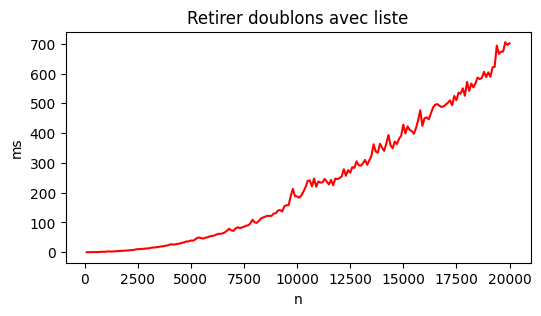

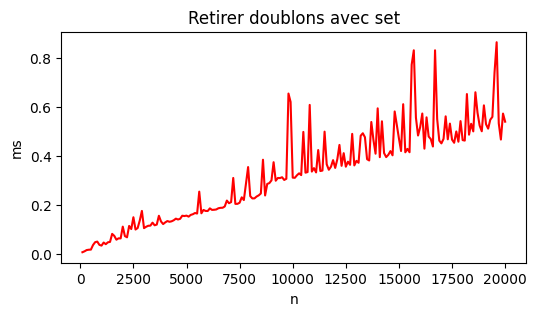

In [115]:
#@title Exercice 8.3

DEPART = 100
FIN = 20000
PAS = 100

def generer_donnees(n):
    elements = []
    nombre_distincts = n//10
    for i in range(nombre_distincts):
        elements.append(i)

    plus_grand = elements[-1]    # Le plus grand va servir à introduire des éléments qui ne sont pas dans la liste

    # On commence par se rendre à 100
    for i in range(n//10, n):
        if random.uniform(0, 1.0) <= 0.5:
            indice = random.randint(0, len(elements)-1)
            valeur = elements[indice]
        else:
            plus_grand += 1
            valeur = plus_grand
        elements.append(valeur)
    return elements

x = []
y_liste = []
y_set = []

for n in range(DEPART, FIN + PAS, PAS):
    elements = generer_donnees(n)
    x.append(n)

    temps_liste = timeit.timeit(lambda: retirer_doublons_liste(elements), number=1)
    y_liste.append(temps_liste * 1000)

    temps_set = timeit.timeit(lambda: retirer_doublons_set(elements), number=1)
    y_set.append(temps_set * 1000)


plt.figure(figsize=(6, 3))
plt.title("Retirer doublons avec liste")
plt.xlabel("n")
plt.ylabel("ms")
plt.plot(x, y_liste, "-r")
plt.show()

plt.figure(figsize=(6, 3))
plt.title("Retirer doublons avec set")
plt.xlabel("n")
plt.ylabel("ms")
plt.plot(x, y_set, "-r")
plt.show()

In [303]:
#@title Exemple 8.2

bd_1 = BandeDessinee("Objectif Lune", 1953, "Les aventures de Tintin", "Hergé")
bd_2 = BandeDessinee("Objectif Lune", 1953, "Les aventures de Tintin", "Hergé")

print(bd_1 == bd_2)

print(f"adresse de bd_1: {hex(id(bd_1))}")
print(f"adresse de bd_2: {hex(id(bd_2))}")

print(hash(bd_1))
print(hash(bd_2))

True
adresse de bd_1: 0x1d015883c50
adresse de bd_2: 0x1d012f63ad0
-5784747083270139930
-5784747083270139930


In [304]:
#@title Exercice 8.4

livres_sans_doublon = []

ensemble = set(les_livres)
livres_sans_doublon = list(ensemble)

print(len(livres_sans_doublon))

256


In [ ]:
#@title Exercice 8.5

NB_RECHERCHES = 15000
NB_COPIES = 1

x = ["42", "annee", "collection:titre"]


def ajouter_livres_fictifs(les_livres:list[BandeDessinee]):
    nouveaux = []
    for livre in les_livres:
        for i in range(0, NB_COPIES):
            nouveau = deepcopy(livre)
            nouveau.set_annee(i)
            nouveaux.append(nouveau)
    les_livres.extend(nouveaux)
        

def determiner_recherches(liste_elements, nb_recherche):
    indices_a_chercher = []
    for i in range(nb_recherche):
        indice = random.randint(0, len(liste_elements)-1)
        indices_a_chercher.append(indice)
    return  indices_a_chercher

def faire_recherches(ensemble, elements, a_chercher):
    for indice in a_chercher:
        livre = elements[indice]
        present = livre in ensemble
        assert(present)

livres_fictifs = livres_sans_doublon.copy()
ajouter_livres_fictifs(livres_fictifs)

print(f"Il y a {len(livres_fictifs)} livres")

livres_42 = deepcopy(livres_fictifs)
for livre in livres_42:
    livre.set_mode("42")
livres_annee = deepcopy(livres_fictifs)
for livre in livres_annee:
    livre.set_mode("annee")
livres_titres = deepcopy(livres_fictifs)

set_42 = set(livres_42)
set_annee = set(livres_annee)
set_titres = set(livres_titres)

recherches = determiner_recherches(livres_fictifs, NB_RECHERCHES)

temps_42 = timeit.timeit(lambda: faire_recherches(set_42, livres_42, recherches), number=10) / 10 * 1000000 / 15000
temps_annee = timeit.timeit(lambda: faire_recherches(set_annee, livres_annee, recherches), number=10) / 10 * 1000000 / 15000
temps_titres = timeit.timeit(lambda: faire_recherches(set_titres, livres_titres, recherches), number=10) / 10 * 1000000 / 15000

y = [temps_42, temps_annee, temps_titres]

plt.figure(figsize=(8, 3))

plt.title("Évaluation des méthodes de hachage")
plt.ylabel("µs")
plt.xlabel("Mode de hachage")
plt.bar(x, y, color="b")
plt.show()






Il y a 512 livres


AssertionError: 